<a href="https://colab.research.google.com/github/bodamohannaik/DLAI-TF-DPC/blob/master/C1/W3/fashion_mnist_practice_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf

# Load Dataset

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
print(f" x_train shape : {x_train.shape}, y_train shape: {y_train.shape}")
print(f" x_test shape : {x_test.shape}, y_test shape: {y_test.shape}")

4431872/4422102 [==============================] - 0s 0us/step
 x_train shape : (60000, 28, 28), y_train shape: (60000,)
 x_test shape : (10000, 28, 28), y_test shape: (10000,)


In [3]:
print(f"range of image pixel values {[x_train.min(), x_train.max()]}")

range of image pixel values [0, 255]


# Visualize the Images

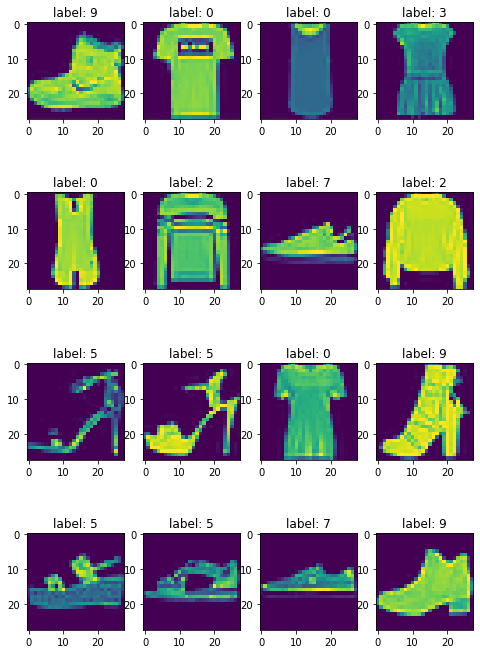

In [4]:
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(8,12))
for i in range(16):
  ax = axs[int(i/4), i%4]
  ax.imshow(x_train[i])
  ax.set_title(f"label: {y_train[i]}")

# Shallow Network

In [5]:
# model
model = tf.keras.Sequential(
    layers = [
              tf.keras.layers.Input(shape=x_train.shape[1:]),
              tf.keras.layers.Rescaling(scale = 1.0/x_train.max()),
              tf.keras.layers.Flatten(),
              tf.keras.layers.Dense(units=512, activation='relu'),
              tf.keras.layers.Dense(units=128, activation='relu'),
              tf.keras.layers.Dense(units=10, activation='softmax')
    ]
)
# print the model summary
model.summary()
# compile
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=["accuracy"])
# fit the model
history = model.fit(x_train, y_train, epochs=10, batch_size=16, validation_data = (x_test, y_test))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 28, 28)            0         
                                                                 
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 128)               65664     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
3750/3750 [============================

# Convolutional Network

In [6]:
# model
model = tf.keras.Sequential(
    layers=[
            tf.keras.layers.Input(shape=x_train.shape[1:]+(1,)),
            tf.keras.layers.Rescaling(scale=1.0/x_train.max()),
            tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
            tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
            tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
            tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(units=128, activation='relu'),
            tf.keras.layers.Dense(units=10, activation='softmax')

    ]
)
# print the model
model.summary()
# compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# fit
model.fit(x_train, y_train, epochs=10, batch_size=16, validation_data =(x_test, y_test))

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 28, 28, 1)         0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1600)             

# Visualize the Conv and Maxpooling layer outputs

In [7]:
input = model.input
input

<KerasTensor: shape=(None, 28, 28, 1) dtype=float32 (created by layer 'input_2')>

In [8]:
output_layers = []
for layer in model.layers:
  output_layers.append(layer.output)
  print(layer.output)
activation_model = tf.keras.Model(inputs=input, outputs=output_layers)
activation_model.summary()

KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name=None), name='rescaling_1/add:0', description="created by layer 'rescaling_1'")
KerasTensor(type_spec=TensorSpec(shape=(None, 26, 26, 64), dtype=tf.float32, name=None), name='conv2d/Relu:0', description="created by layer 'conv2d'")
KerasTensor(type_spec=TensorSpec(shape=(None, 13, 13, 64), dtype=tf.float32, name=None), name='max_pooling2d/MaxPool:0', description="created by layer 'max_pooling2d'")
KerasTensor(type_spec=TensorSpec(shape=(None, 11, 11, 64), dtype=tf.float32, name=None), name='conv2d_1/Relu:0', description="created by layer 'conv2d_1'")
KerasTensor(type_spec=TensorSpec(shape=(None, 5, 5, 64), dtype=tf.float32, name=None), name='max_pooling2d_1/MaxPool:0', description="created by layer 'max_pooling2d_1'")
KerasTensor(type_spec=TensorSpec(shape=(None, 1600), dtype=tf.float32, name=None), name='flatten_1/Reshape:0', description="created by layer 'flatten_1'")
KerasTensor(type_spec=TensorSpec(shap

In [9]:
print(y_test[:100])

[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7
 5 7 9 6 1 3 7 6 7 2 1 2 2 4 4 5 8 2 2 8 4 8 0 7 7 8 5 1 1 2 3 9 8 7 0 2 6
 2 3 1 2 8 4 1 8 5 9 5 0 3 2 0 6 5 3 6 7 1 8 0 1 4 2]


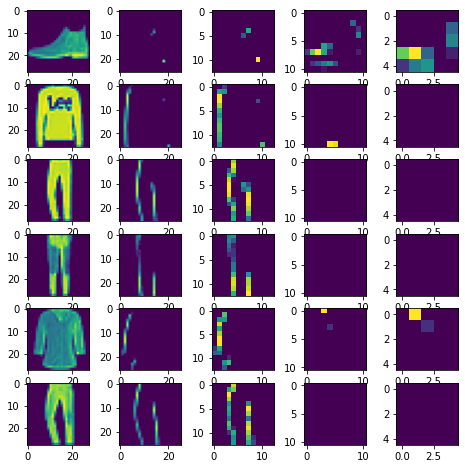

In [10]:
fig, axs = plt.subplots(nrows=6, ncols=5, figsize = (8,8))
image_id_list = [0, 1, 2, 3, 4, 5]
for image_idx in range(len(image_id_list)):
  for layer_idx in range(0,5):
    ax = axs[image_idx, layer_idx]
    image_out = activation_model(x_test[image_id_list[image_idx]].reshape(1,28,28,1))[layer_idx]
    ax.imshow(image_out[0, :,:,0])


# Decrease the filters


In [11]:
# Decrease features
# model
model = tf.keras.Sequential(
    layers=[
            tf.keras.layers.Input(shape=x_train.shape[1:]+(1,)),
            tf.keras.layers.Rescaling(scale=1.0/x_train.max()),
            tf.keras.layers.Conv2D(filters=16, kernel_size=(3,3), activation='relu'),
            tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
            tf.keras.layers.Conv2D(filters=16, kernel_size=(3,3), activation='relu'),
            tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(units=128, activation='relu'),
            tf.keras.layers.Dense(units=10, activation='softmax')

    ]
)
# print the model
model.summary()
# compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# fit
model.fit(x_train, y_train, epochs=10, batch_size=16, validation_data =(x_test, y_test))

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 28, 28, 1)         0         
                                                                 
 conv2d_2 (Conv2D)           (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 16)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 16)        2320      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 400)              

# only one Convolution

In [12]:
# Decrease features
# model
model = tf.keras.Sequential(
    layers=[
            tf.keras.layers.Input(shape=x_train.shape[1:]+(1,)),
            tf.keras.layers.Rescaling(scale=1.0/x_train.max()),
            tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
            tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
            # tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
            # tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(units=128, activation='relu'),
            tf.keras.layers.Dense(units=10, activation='softmax')

    ]
)
# print the model
model.summary()
# compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# fit
model.fit(x_train, y_train, epochs=10, batch_size=16, validation_data =(x_test, y_test))

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_3 (Rescaling)     (None, 28, 28, 1)         0         
                                                                 
 conv2d_4 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 10816)             0         
                                                                 
 dense_7 (Dense)             (None, 128)               1384576   
                                                                 
 dense_8 (Dense)             (None, 10)                1290      
                                                      

# Additional Exercises

# tf.keras.layers.Input

In [13]:
input = tf.keras.layers.Input(shape=(5,))
input

<KerasTensor: shape=(None, 5) dtype=float32 (created by layer 'input_5')>

A Keras tensor is a symbolic tensor-like object, which we augment with certain attributes that allow us to build a Keras model just by knowing the inputs and outputs of the model.

In [14]:
#  this does not work
# input(np.array([[1,2,3,4,5]]))

# tf.keras.layers.Rescaling

In [15]:
scaling = tf.keras.layers.Rescaling(scale=100)
scaling

In [16]:
scaling(np.array([0.25, .5, .75, 1.0]))

<tf.Tensor: shape=(4,), dtype=float32, numpy=array([ 25.,  50.,  75., 100.], dtype=float32)>

# tf.keras.layers.Flatten

In [17]:
flatten = tf.keras.layers.Flatten()
flatten

In [18]:
# needs shape (batch, ..., channels), 3D atleast
flatten(np.array([[1,2,3],[4,5,6]]))

<tf.Tensor: shape=(2, 3), dtype=int64, numpy=
array([[1, 2, 3],
       [4, 5, 6]])>

In [19]:
flatten(np.array([[[1,2,3],[4,5,6]]]))

<tf.Tensor: shape=(1, 6), dtype=int64, numpy=array([[1, 2, 3, 4, 5, 6]])>

# tf.keras.layers.Dense

In [20]:
dense = tf.keras.layers.Dense(units=4, activation ='relu', use_bias=True)
dense

In [21]:
dense.weights

[]

In [22]:
dense(np.array([[1,2,3,4,5]]))

<tf.Tensor: shape=(1, 4), dtype=float32, numpy=array([[1.221561, 8.708525, 0.      , 0.      ]], dtype=float32)>

In [23]:
dense.weights

[<tf.Variable 'dense_9/kernel:0' shape=(5, 4) dtype=float32, numpy=
 array([[-0.22020507,  0.6499531 ,  0.41423333, -0.12257636],
        [ 0.63999176, -0.19953138, -0.7111112 , -0.23867792],
        [ 0.04236168,  0.7070875 ,  0.47425354, -0.578399  ],
        [ 0.31728518,  0.80714655, -0.30202347,  0.00696349],
        [-0.24688864,  0.62155724, -0.63070494,  0.13966572]],
       dtype=float32)>,
 <tf.Variable 'dense_9/bias:0' shape=(4,) dtype=float32, numpy=array([0., 0., 0., 0.], dtype=float32)>]

In [24]:
dense.count_params()

24